<a href="https://colab.research.google.com/github/psgrigoletti/margem-liquida-colab/blob/main/2022_07_17_Coletando_dados_do_Banco_Central.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Coletando dados do Banco Central com Python


O ideal é que todo o processo da análise de dados econômicos e financeiros deve ser facilitado em todas as etapas, principalmente as iniciais, que constam como a coleta e tratamento de dados. Por sorte, existem pacotes e funções prontas que facilitam todo esse processo para os usuários, como é o caso do python-bcb, que nos ajuda a coletar dados do Banco Central. Neste post de hoje, mostramos como é fácil retirar esses dados.

O python-bcb é uma interface em Python estruturada para obter informações da API de dados abertos do Banco Central do Brasil.

A interface oferece diversas APIs que permitem acessar os dados de vários bancos de dados do BACEN. Sendo eles:

- Sistema Gerenciador de Séries Temporais (SGS);
- Conversor de moedas;
- Expectativas divulgadas pelo boletim FOCUS;
- Integração com o OData, fornecendo dados de Expectativas, Moedas, Taxas de Juros, IFdata e Mercado Imobiliário.

# Sistema Gerenciador de Séries Temporais

O SGS consolida e divulga diversas séries econômico-financeiros mantidas pelo Banco Central e também por outras instituições. É nesse gerenciador que podemos encontrar as séries de diversos temas: Atividade Econômica, Preços, Mercado de Trabalho, Setor Externo, Finanças Públicas, Juros e etc.

São ofertadas as séries em diferentes periodicidades e formatos, portanto, somando todos os fatores, se torna um sistema ideal para coletar séries, ainda mais quando o próprio BCB oferece APIs que facilitam a extração.

Para buscar uma série do SGS com o python-bcb, seguiremos os seguintes passos:

- Importar a API sgs do python-bcb no Python;
- Buscar o código da série no site https://www3.bcb.gov.br/sgspub/localizarseries/localizarSeries.do?method=prepararTelaLocalizarSeries;
- Utilizar a função sgs.get(), especificando o código e o período de interesse.

In [ ]:
# Importa as bibliotecas

!pip install python-bcb
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

Como exemplo, utilizamos a série da Taxa de juros - Meta Selic definida pelo Copom %a.a, identificada pelo código 432 no SGS. Vemos abaixo como é possível utilizar a função sgs.get().

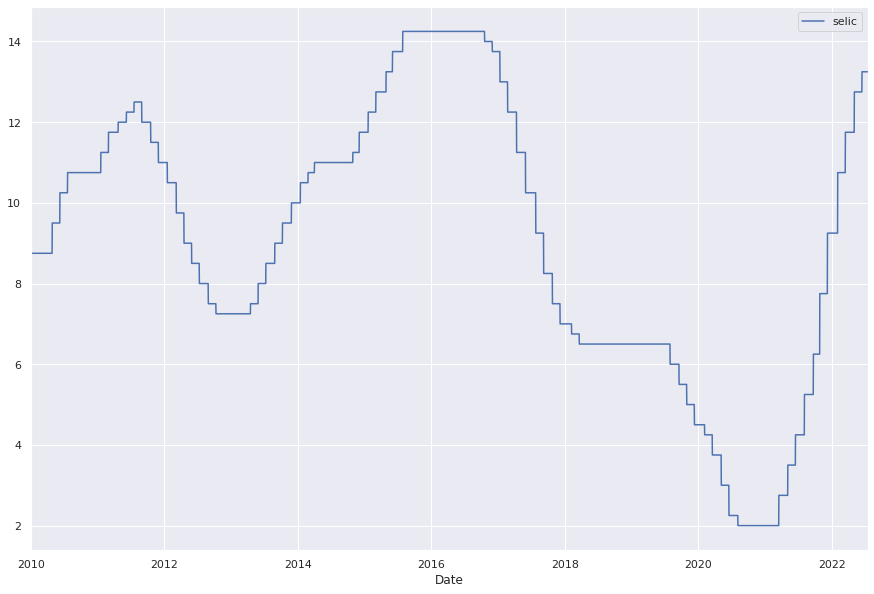

In [2]:
from bcb import sgs

# Busca a série da SELIC no SGS
selic = sgs.get({'selic':432}, start = '2010-01-01')

# Plota
sns.set_theme()
selic.plot(figsize = (15, 10))

Caso haja a necessidade em importar mais de uma série, também é possível. Abaixo, importamos as séries do IPCA Mensal em Var. % mensal e do IGP-M Var. % mensal.


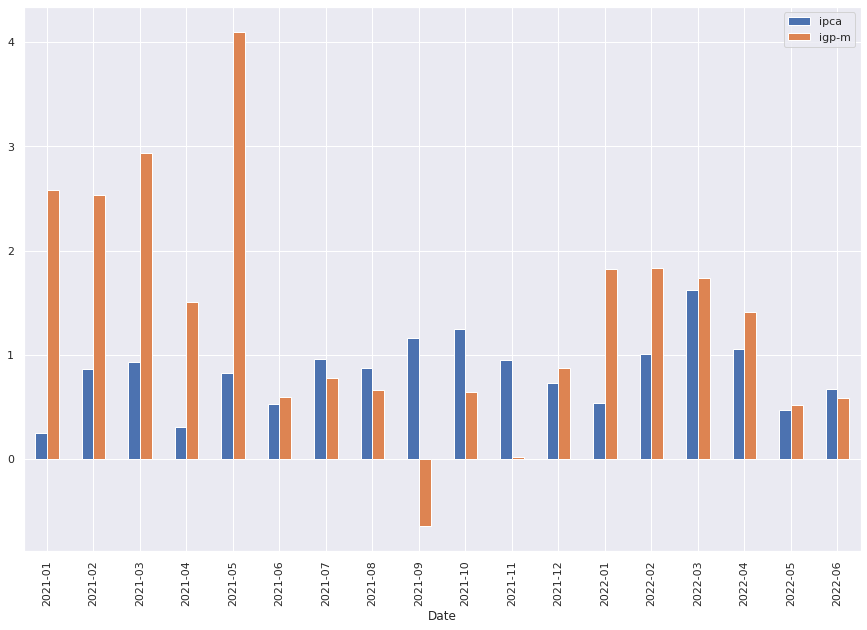

In [3]:
# Busca a série do IPCA e IGP-M
ifl_month = sgs.get({'ipca': 433,
             'igp-m': 189}, start = '2021-01-01')

# Transforma a frequência da data em mensal
ifl_month.index = ifl_month.index.to_period('M')

# Plota o gráfico de barras
ifl_month.plot(kind = 'bar', figsize = (15, 10))


# Conversor de Moedas

O Conversor de Moedas realiza o Web Scrapping do sistema de mesmo nome do Banco Central. Permite que seja importado as cotações diárias de diversas moedas diante do real. Para saber as moedas que são possíveis de importar, e consequentemente seus respectivos símbolos, utiliza-se a função currency.get_currency_list().

In [5]:
from bcb import currency

currency.get_currency_list()

,code,name,symbol,country_code,country_name,type,exclusion_date
0,5,AFEGANE AFEGANIST,AFN,132,AFEGANISTAO ...,A,NaT
1,785,RANDE/AFRICA SUL,ZAR,7560,AFRICA DO SUL ...,A,NaT
2,490,LEK ALBANIA REP,ALL,175,"ALBANIA, REPUBLICA DA ...",A,NaT
3,610,MARCO ALEMAO,DEM,230,ALEMANHA ...,A,2002-01-02
4,978,EURO,EUR,230,ALEMANHA ...,B,NaT
...,...,...,...,...,...,...,...
267,220,DOLAR DOS EUA,USD,8630,"VIRGENS,ILHAS (BRITANICAS) ...",A,NaT
268,220,DOLAR DOS EUA,USD,8664,"VIRGENS,ILHAS (E.U.A.) ...",A,NaT
269,766,QUACHA ZAMBIA,ZMW,8907,ZAMBIA ...,A,NaT
270,765,QUACHA ZAMBIA,ZMK,8907,ZAMBIA ...,A,2012-12-31


A função retorna um data frame contendo as colunas com cada uma contendo os códigos numéricos da moeda, o nome completo da moeda, o símbolo de cada moeda, e o código do país, o nome do país, o tipo e a data de exclusão.

Após escolhido as moedas de interesse com base na lista do conversor, utiliza-se a função currency.get() para obter as moedas diante do real com base no seus respectivos símbolos e período.

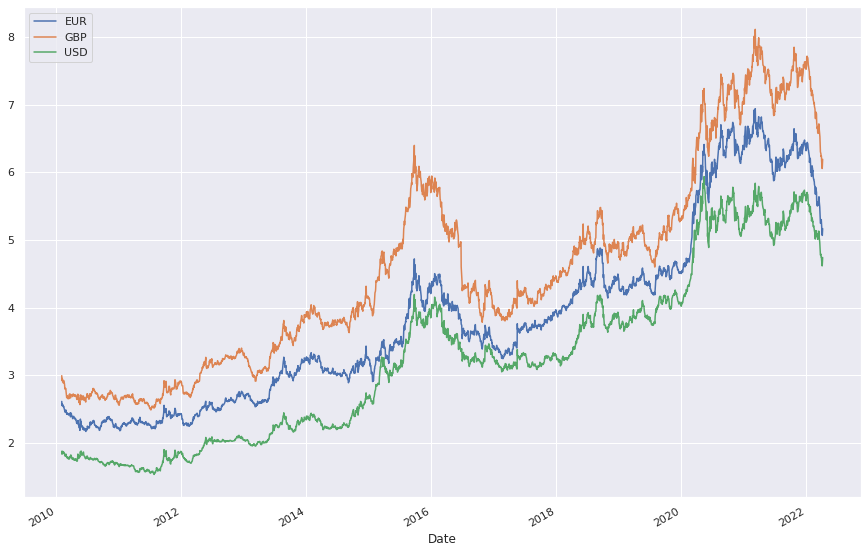

In [6]:
# Importas moedas 

cy = currency.get(['USD', 'EUR', 'GBP'], start='2010-02-01', end='2022-04-07')

# Plota

cy.plot(figsize = (15, 10))

# Expectativas FOCUS

O python-bcb oferece a API Expectativas como forma de obter os dados divulgados pelo boletim FOCUS. Essa integração permite obter as expectativas de mercado de cerca de 130 instituições do mercado financeiros que participam do Sistema de Expectativa de Mercado. Para obter os dados, primeiro devemos instanciar com a classe bcb.Expectativas e obter as informações dos endpoints com o método bcb.Expectativas.describe()

In [8]:
from bcb import Expectativas

# Obtém as informações do API

expec = Expectativas()

# Realiza a leitura dos endpoints

expec.describe()

EntitySets:
  ExpectativasMercadoTop5Anuais
  ExpectativasMercadoInstituicoes
  ExpectativaMercadoMensais
  ExpectativasMercadoInflacao12Meses
  ExpectativasMercadoSelic
  ExpectativasMercadoTop5Selic
  ExpectativasMercadoTop5Mensais
  ExpectativasMercadoTrimestrais
  ExpectativasMercadoAnuais


Veja que é retornado os EntitySets, que são os endpoints do qual podemos importar os dados das Expectativas de Mercado, como exemplos, iremos buscar as Expectativas de Mercado Anuais.

In [10]:
# Busca o endpoint

expec.describe('ExpectativasMercadoAnuais')



EntitySet (Endpoint): ExpectativasMercadoAnuais
EntityType: br.gov.bcb.olinda.servico.Expectativas.ExpectativaMercadoAnual
Properties: Indicador<str>, IndicadorDetalhe<str>, Data<str>, DataReferencia<str>, Media<float>, Mediana<float>, DesvioPadrao<float>, Minimo<float>, Maximo<float>, numeroRespondentes<int>, baseCalculo<int>


É retornado todas as informações do endpoint escolhido, com suas respectivas colunas. Isto é útil devido ao fato de caso haja a necessidade de importações do dados já filtrados, desta forma, é possível saber quais colunas poderemos realizar os filtros.

Com todas as informações sobre o endpoint em mãos, iremos de fato importa-las com o python-bcb, utilizando a função expec.get_endpoint(), especificando o endpoint de interesse. Assim que conectamos com o endpoint, realizamos o query com  o método query(). No exemplo abaixo, realizamos esses dois procedimentos em conjunto com uma filtragem para o indicador da Selic.

In [11]:
# Importa o endpoint

ep = expec.get_endpoint('ExpectativasMercadoAnuais')

# Realiza o query com filtro

ep.query().filter(ep.Indicador == 'Selic').collect()

,Indicador,IndicadorDetalhe,Data,DataReferencia,Media,Mediana,DesvioPadrao,Minimo,Maximo,numeroRespondentes,baseCalculo
0,Selic,None,2000-01-03,2000,16.8300,16.65,1.5800,NaN,NaN,NaN,0
1,Selic,None,2000-01-04,2000,16.8300,16.65,1.5800,NaN,NaN,NaN,0
2,Selic,None,2000-01-05,2000,16.8800,16.80,1.5700,NaN,NaN,NaN,0
3,Selic,None,2000-01-06,2000,16.7300,16.80,1.1700,NaN,NaN,NaN,0
4,Selic,None,2000-01-07,2000,16.7300,16.80,1.1700,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...
28847,Selic,None,2022-07-08,2022,13.7520,13.75,0.2243,13.00,14.25,128.0,0
28848,Selic,None,2022-07-08,2023,10.6950,10.50,1.0460,8.25,13.75,125.0,0
28849,Selic,None,2022-07-08,2024,8.0216,8.00,1.1116,6.00,12.25,104.0,0
28850,Selic,None,2022-07-08,2025,7.5684,7.50,0.8510,6.00,10.00,95.0,0


# OData

O OData do Banco Central permite acesso a mais dados do sistema, incluindo o API do Expectativas (bcb.Expectativas), também é possível retirar dados da PTAX (bcb.PTAX), que permite acesso a cotações de taxas de câmbio, Taxa de Juros dos bancos (bcb.TaxaJuros), dados de Instituições Financeiras (bcb.IFDATA) e dados do Mercado Imobiliário (bcb.MercadoImobiliario).

O processo de retirada de dados do OData segue o mesmo que realizamos com o bcb.Expectativas acima, sendo possível realizar com as outras APIs. Primeiro colhemos as informações da API e seus respectivos endpoints com describe(), e após, colhemos as informações de interesse com get_endpoint() e query(). Vemos um exemplo abaixo com a API TaxadeJuros.

In [12]:
from bcb import TaxaJuros

# Salva as informações

juros = TaxaJuros()

# Descreve as informações

juros.describe()

juros.describe('TaxasJurosMensalPorMes')

EntitySets:
  TaxasJurosMensalPorMes
  TaxasJurosDiariaPorInicioPeriodo

EntitySet (Endpoint): TaxasJurosMensalPorMes
EntityType: br.gov.bcb.olinda.servico.taxaJuros.TaxaJurosMensal
Properties: Mes<str>, Modalidade<str>, Posicao<int>, InstituicaoFinanceira<str>, TaxaJurosAoMes<float>, TaxaJurosAoAno<float>, cnpj8<str>, anoMes<str>


In [13]:
# Conecta com o endpoint

tj = juros.get_endpoint('TaxasJurosMensalPorMes')

# Importa os dados

tj.query().limit(10).collect()

,Mes,Modalidade,Posicao,InstituicaoFinanceira,TaxaJurosAoMes,TaxaJurosAoAno,cnpj8,anoMes
0,Jun-2022,FINANCIAMENTO IMOBILIÁRIO COM TAXAS REGULADAS ...,26,BCO DO ESTADO DO RS S.A.,0.67,8.28,92702067,2022-06
1,Jun-2022,FINANCIAMENTO IMOBILIÁRIO COM TAXAS DE MERCADO...,46,CAIXA ECONOMICA FEDERAL,0.79,9.90,00360305,2022-06
2,Jun-2022,FINANCIAMENTO IMOBILIÁRIO COM TAXAS REGULADAS ...,62,APE POUPEX,0.79,9.90,00655522,2022-06
3,Jun-2022,FINANCIAMENTO IMOBILIÁRIO COM TAXAS REGULADAS ...,3,BCO DO EST. DE SE S.A.,0.00,0.00,13009717,2022-06
4,Jun-2022,FINANCIAMENTO IMOBILIÁRIO COM TAXAS REGULADAS ...,65,CAIXA ECONOMICA FEDERAL,0.80,10.02,00360305,2022-06
5,Jun-2022,FINANCIAMENTO IMOBILIÁRIO COM TAXAS DE MERCADO...,116,BCO SANTANDER (BRASIL) S.A.,0.98,12.39,90400888,2022-06
6,Jun-2022,FINANCIAMENTO IMOBILIÁRIO COM TAXAS REGULADAS ...,200,BCO SANTANDER (BRASIL) S.A.,0.96,12.17,90400888,2022-06
7,Jun-2022,FINANCIAMENTO IMOBILIÁRIO COM TAXAS DE MERCADO...,204,APE POUPEX,0.61,7.60,00655522,2022-06
8,Jun-2022,FINANCIAMENTO IMOBILIÁRIO COM TAXAS REGULADAS ...,36,APE POUPEX,0.33,4.08,00655522,2022-06
9,Jun-2022,FINANCIAMENTO IMOBILIÁRIO COM TAXAS DE MERCADO...,205,APE POUPEX,1.11,14.14,00655522,2022-06


No exemplo acima retiramos os dados das taxas de juros de diversas instituições bancárias do Brasil. Veja que limitamos o query para apenas 10 observações, apenas como exemplo para que não haja demoras na importação.

Link: https://analisemacro.com.br/economia/indicadores/coletando-dados-do-banco-central-com-python/